In [1]:
# Habilito librerias
import xarray as xr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Busco y abro archivo de sea surface temperature (SST)
file = 'HOT_sst.csv'
df = pd.read_csv(file,
                  index_col='time',parse_dates=True) # Habilito la interpretación de tiempo

In [3]:
# Calculamos los SST anuales, mensuales, y los maximos (perc 95) y mínimos (perc 05) anuales
df_year = df['sst'].resample('1Y').mean()
df_mon = df['sst'].resample('1M').mean()
df_95 = df['sst'].resample('1Y').quantile(.95)
df_05 = df['sst'].resample('1Y').quantile(.05)

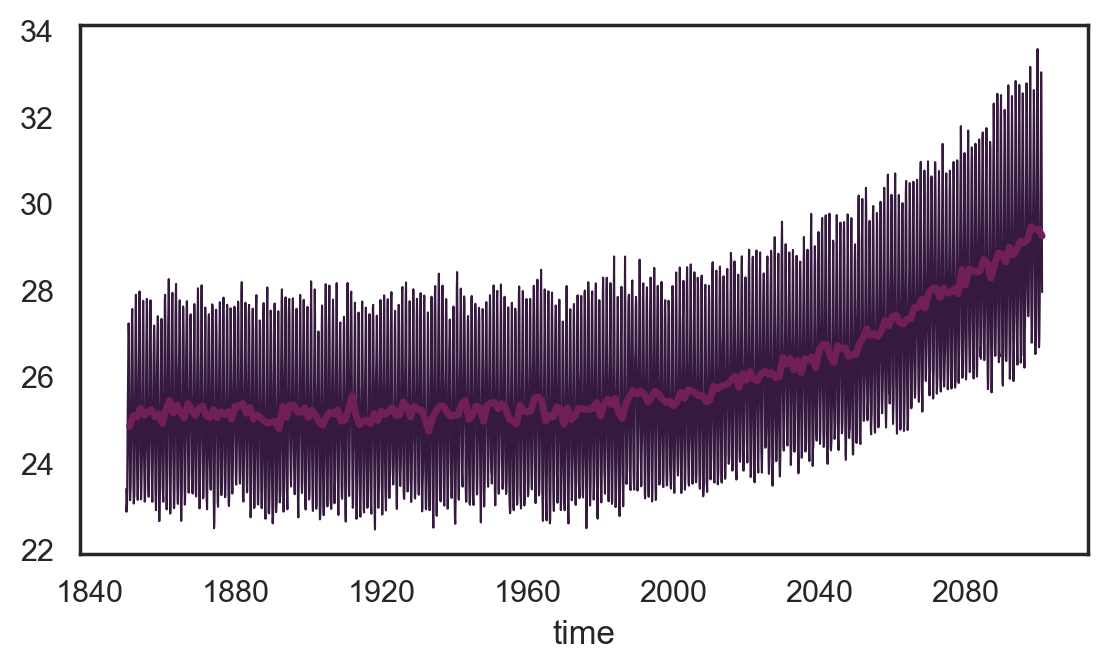

In [4]:
# Dibujamos una serie temporal de los SST anuales y mensuales
sns.set_theme(style="white")
sns.set_palette(sns.color_palette("rocket"))
f, ax = plt.subplots(figsize=(6.5, 3.5),
                     dpi=200)

sns.lineplot(y=df_mon.values,
             x=df_mon.index,
            lw=0.75) #Plot de los valores diarios
sns.lineplot(y=df_year.values,
             x=df_year.index,
            lw=2.5)
plt.show()

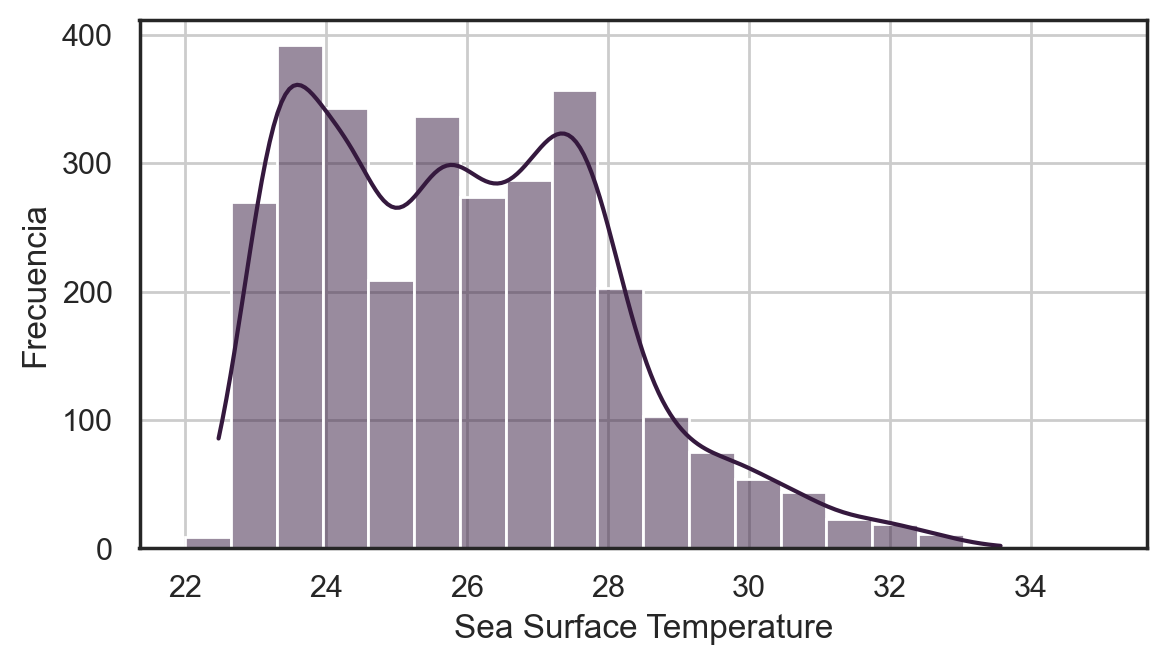

In [5]:
n_bins = 20

# Histograma de distribución

f, ax = plt.subplots(figsize=(6.5, 3.5),
                     dpi=200)
sns.histplot(df_mon,bins=n_bins,kde=True,
             binrange=[22,35])

plt.grid()
plt.xlabel('Sea Surface Temperature')
plt.ylabel('Frecuencia')
plt.show()

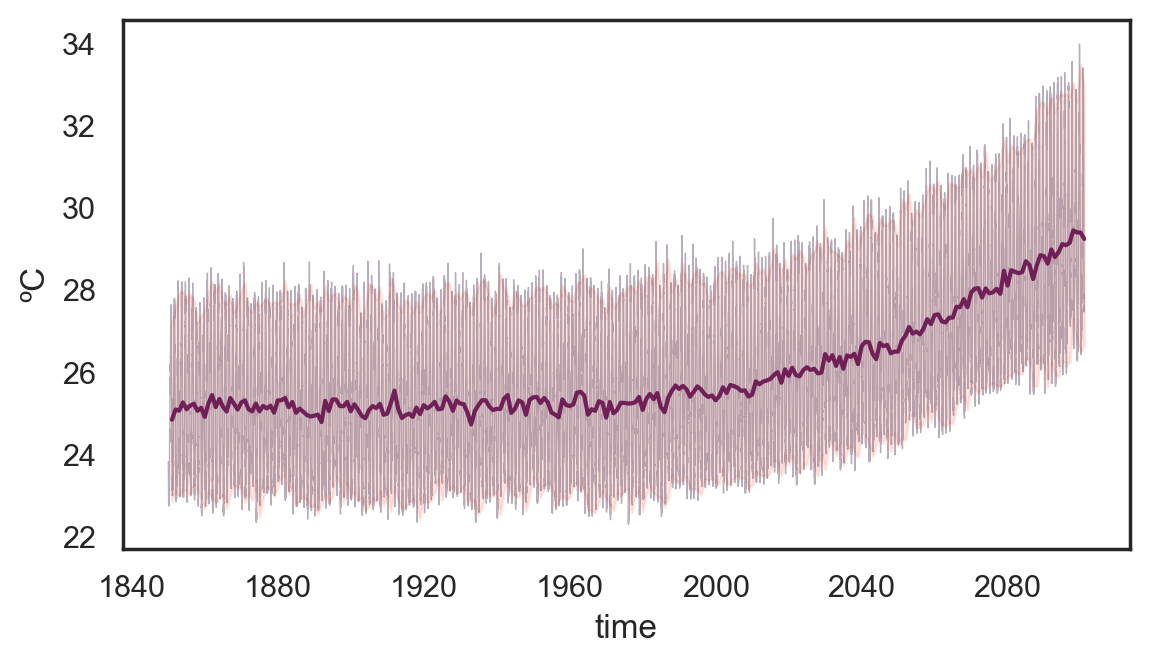

In [6]:
# Dibujamos una serie temporal de los SST y su distribución (min y max)
f, ax = plt.subplots(figsize=(6.5, 3.5),
                     dpi=200)
sns.lineplot(y=df['sst'].values,
             x=df.index,
            lw=.5,alpha=0.35) # datos diarios
ax.fill_between(df_year.index,
                df_95,df_05,
                color='tomato',
                alpha=0.15) # distribución
sns.lineplot(y=df_year.values,
             x=df_year.index,
            lw=1.5,) # media anual
plt.ylabel('ºC')
plt.show()